In [134]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load dataset
# Replace the path with your file's path
file_path = "/Users/georgemathew/Desktop/Desktop Folders/HP BACKUP/C DRIVE/Desktop/Kerala Summons/GEM/Personal/Retirement/Post retirement engagement/Unified Mentor/Projects/Projects ML/Shortlisted projects/Mobile Phone Pricing/dataset.csv"
data = pd.read_csv(file_path)

# Display basic info
print(data.info())
print(data.head())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [135]:
# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())
# If there are missing values, handle them
# Example: data.fillna(data.median(), inplace=True)  # Replace missing values with the median


Missing values per column:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


Count of '0' values in each column:
battery_power       0
blue             1010
clock_speed         0
dual_sim          981
fc                474
four_g            957
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                101
px_height           2
px_width            0
ram                 0
sc_h                0
sc_w              180
talk_time           0
three_g           477
touch_screen      994
wifi              986
price_range       500
dtype: int64


<AxesSubplot:>

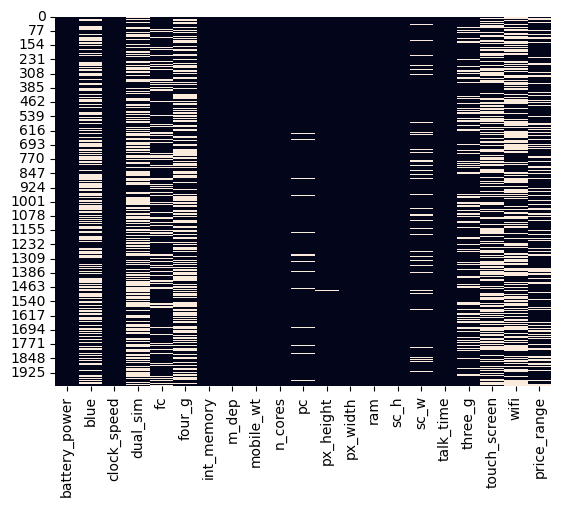

In [136]:
# Count '0' values in each column
zero_counts = (data == 0).sum()
print("Count of '0' values in each column:")
print(zero_counts)
sns.heatmap(data==0, cbar=False)

In [137]:
# Handle 'px_height' with nearest match
print("\nHandling 'px_height' with nearest match...")
# Function to find the nearest match and replace px_height
def replace_px_height_nearest_match(data):
    # Filter rows where px_height is 0
    rows_with_zero_px_height = data[data['px_height'] == 0].copy()
    
    # List to store details of updates
    updated_indices = []
    updated_details = []
    
    # Iterate over these rows to find the nearest match
    for idx, row in rows_with_zero_px_height.iterrows():
        # Calculate the absolute differences for each feature
        data['distance'] = (
            (data['price_range'] - row['price_range']).abs() +
            (data['fc'] - row['fc']).abs() +
            (data['px_width'] - row['px_width']).abs()
        )
        
        # Exclude rows where px_height is 0 or the same row itself
        valid_matches = data[(data['px_height'] != 0) & (data.index != idx)]
        
        if not valid_matches.empty:
            # Find the row with the minimum distance
            nearest_match_idx = valid_matches['distance'].idxmin()
            nearest_match_row = data.loc[nearest_match_idx]
            
            # Update px_height in the original data
            original_px_height = data.at[idx, 'px_height']
            data.at[idx, 'px_height'] = nearest_match_row['px_height']
            
            # Track the update
            updated_indices.append(idx)
            updated_details.append({
                'Updated_Index': idx,
                'Updated_px_height': nearest_match_row['px_height'],
                'Original_px_height': original_px_height,
                'Matched_Index': nearest_match_idx,
                'Matched_px_height': nearest_match_row['px_height'],
            })
            
            print(f"Updated row index {idx} with px_height from row index {nearest_match_idx}")
        else:
            print(f"No valid match found for row index {idx}")
    
    # Drop the temporary 'distance' column
    data = data.drop(columns=['distance'], errors='ignore')
    
    # Return the updated data and details of updates
    return data, updated_indices, updated_details

# Apply the function to replace px_height
updated_data, updated_indices, updated_details = replace_px_height_nearest_match(data)

# Display the updated rows for verification
if updated_indices:
    updated_rows = updated_data.loc[updated_indices]
    print("Updated rows:\n", updated_rows)
else:
    print("No rows were updated.")

# Print detailed update information
if updated_details:
    print("\nDetails of updates:")
    for detail in updated_details:
        print(detail)
else:
    print("No update details were recorded.")


Handling 'px_height' with nearest match...
Updated row index 1481 with px_height from row index 1504
Updated row index 1933 with px_height from row index 324
Updated rows:
       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1481           1834     0          2.1         0   7       1          40   
1933            897     1          2.0         0   3       1           2   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1481    0.1         99        4  ...        809      1987  3692    13     0   
1933    0.6        154        8  ...        363       994  1958     7     5   

      talk_time  three_g  touch_screen  wifi  price_range  
1481         16        1             1     0            3  
1933          7        1             1     0            1  

[2 rows x 21 columns]

Details of updates:
{'Updated_Index': 1481, 'Updated_px_height': 809.0, 'Original_px_height': 0, 'Matched_Index': 1504, 'Matched_px_height': 809.0}
{'Updat

In [138]:
# Handle 'sc_w' values
print("\nHandling 'sc_w' values...")
# Function to replace sc_w values and display paired records
def replace_sc_w_and_display_pairs(data):
    # Filter rows where sc_w is 0
    rows_with_zero_sc_w = data[data['sc_w'] == 0].copy()

    # List to store paired records and pairing counts
    paired_records_details = []

    # Iterate over rows with sc_w == 0
    for idx, row in rows_with_zero_sc_w.iterrows():
        # Calculate the absolute differences for the matching features
        data['distance'] = (
            (data['price_range'] - row['price_range']).abs() +
            (data['touch_screen'] - row['touch_screen']).abs() +
            (data['sc_h'] - row['sc_h']).abs()
        )

        # Exclude rows where sc_w is 0 or the same row itself
        valid_matches = data[(data['sc_w'] != 0) & (data.index != idx)]

        if not valid_matches.empty:
            # Find the row with the minimum distance
            nearest_match_idx = valid_matches['distance'].idxmin()
            nearest_match_row = data.loc[nearest_match_idx]

            # Update sc_w in the original data
            data.at[idx, 'sc_w'] = nearest_match_row['sc_w']

            # Append details of the paired records
            paired_records_details.append((row, nearest_match_row))

            print(f"Updated row index {idx} with sc_w from row index {nearest_match_idx}")
        else:
            print(f"No valid match found for row index {idx}")

    # Drop the temporary 'distance' column
    data = data.drop(columns=['distance'], errors='ignore')

    # Return the updated data and paired records details
    return data, paired_records_details

# Assuming 'data' is your dataset DataFrame
# Apply the function to replace sc_w and get paired records
updated_data, paired_records_details = replace_sc_w_and_display_pairs(data)

# Create a DataFrame to store all paired records
paired_records_df = pd.DataFrame()

# Iterate through paired records details to create the desired output format
for idx, (zero_sc_w_record, paired_record) in enumerate(paired_records_details):
    # Combine the pair into a single DataFrame
    pair_df = pd.DataFrame([zero_sc_w_record, paired_record])
    # Append the pair to the main DataFrame
    paired_records_df = pd.concat([paired_records_df, pair_df], ignore_index=True)

# Display paired records for verification
print("\nPaired records for verification:\n", paired_records_df)

# Save the paired records to a CSV file for further inspection (optional)
paired_records_df.to_csv("paired_records_sc_w.csv", index=False)

# Display details of each pair with all 21 fields
for idx, (zero_sc_w_record, paired_record) in enumerate(paired_records_details):
    print(f"\nSet {idx+1}:\nRecord with '0' sc_w:\n{zero_sc_w_record}\nPaired record:\n{paired_record}")


Handling 'sc_w' values...
Updated row index 12 with sc_w from row index 111
Updated row index 24 with sc_w from row index 22
Updated row index 33 with sc_w from row index 69
Updated row index 42 with sc_w from row index 43
Updated row index 50 with sc_w from row index 838
Updated row index 54 with sc_w from row index 182
Updated row index 62 with sc_w from row index 162
Updated row index 73 with sc_w from row index 219
Updated row index 86 with sc_w from row index 7
Updated row index 119 with sc_w from row index 75
Updated row index 128 with sc_w from row index 168
Updated row index 131 with sc_w from row index 201
Updated row index 140 with sc_w from row index 251
Updated row index 141 with sc_w from row index 8
Updated row index 144 with sc_w from row index 96
Updated row index 157 with sc_w from row index 76
Updated row index 158 with sc_w from row index 21
Updated row index 159 with sc_w from row index 273
Updated row index 186 with sc_w from row index 205
Updated row index 207 wi

In [139]:
# Handle outliers in 'px_height'
# Calculating Q1, Q3, and IQR
Q1 = data['px_height'].quantile(0.25)
Q3 = data['px_height'].quantile(0.75)
IQR = Q3 - Q1

# Defining the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = data[(data['px_height'] < lower_bound) | (data['px_height'] > upper_bound)]

# Calculating the percentage of outliers
outlier_percentage = (len(outliers) / len(data)) * 100

# If outliers are less than 3% of the total records, remove them
if outlier_percentage < 3:
    data = data[(data['px_height'] >= lower_bound) & (data['px_height'] <= upper_bound)]
    print("Outliers removed.")
else:
    print("Outliers constitute more than 3% of the total records. No records removed.")

# Display the number of outliers and the outlier percentage
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

Outliers removed.
Number of outliers: 2
Percentage of outliers: 0.10%


In [140]:
# Define features and target
X = data.drop('price_range', axis=1)
y = data['price_range']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

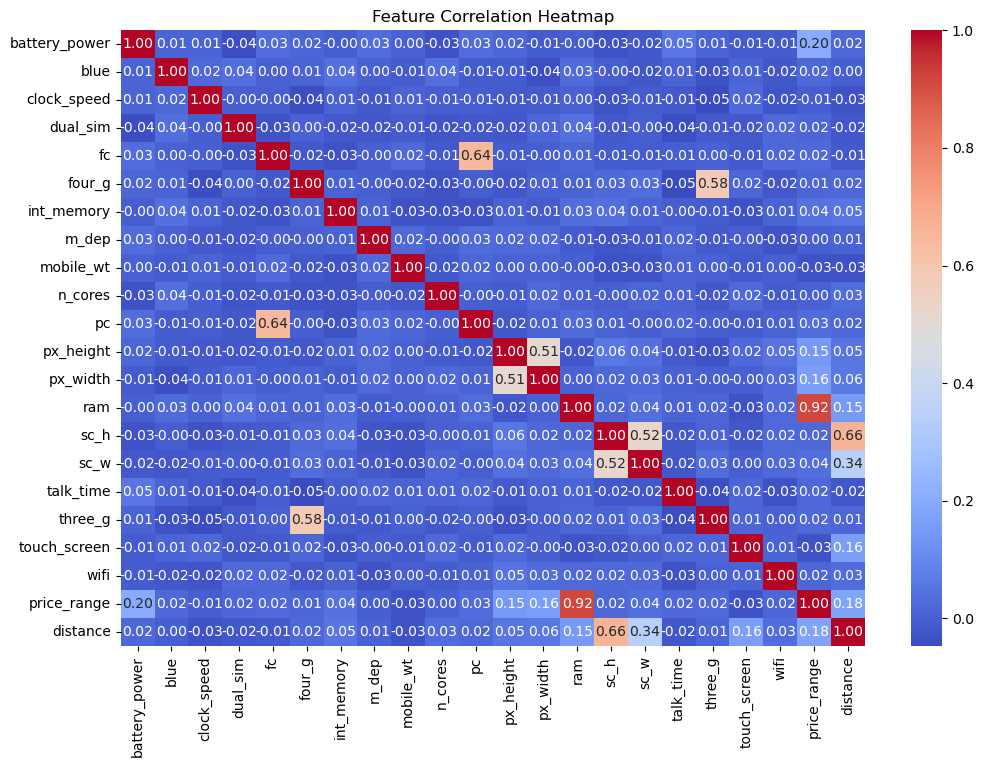

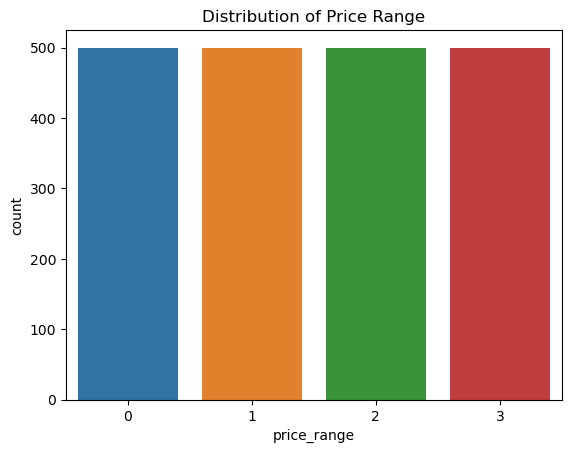

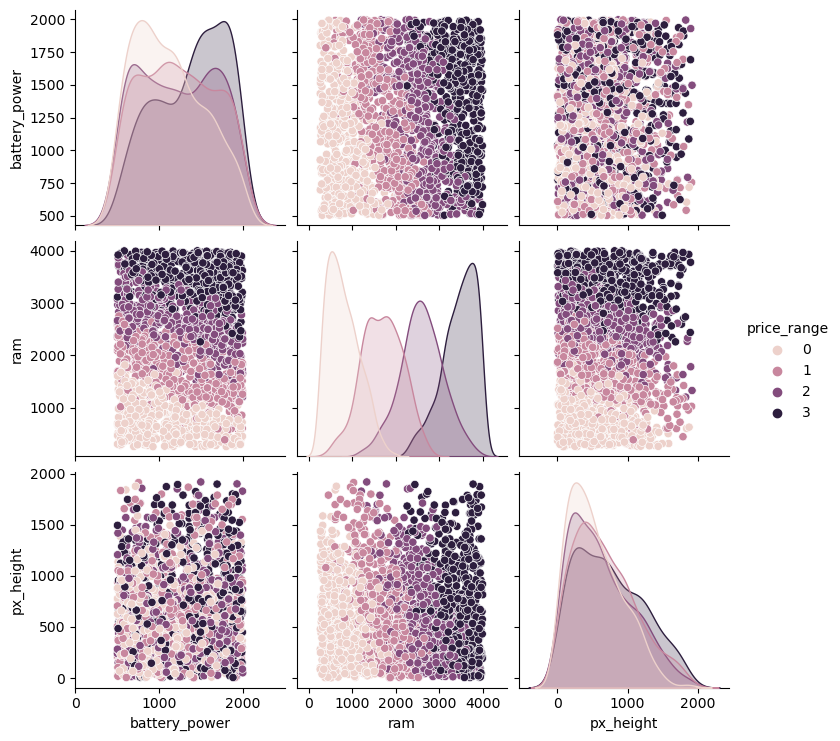

In [141]:
# Visualizations
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution of price_range
sns.countplot(x='price_range', data=data)
plt.title("Distribution of Price Range")
plt.show()

# Pairplot for key features
sns.pairplot(data[['battery_power', 'ram', 'px_height', 'price_range']], hue='price_range')
plt.show()

In [142]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        98
           1       0.97      0.97      0.97       103
           2       0.95      0.98      0.96        94
           3       0.99      0.97      0.98       105

    accuracy                           0.97       400
   macro avg       0.97      0.98      0.97       400
weighted avg       0.98      0.97      0.98       400

Confusion Matrix:
 [[ 96   2   0   0]
 [  1 100   2   0]
 [  0   1  92   1]
 [  0   0   3 102]]


In [143]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluation
print("KNN Results:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Results:
              precision    recall  f1-score   support

           0       0.56      0.63      0.60        98
           1       0.35      0.42      0.38       103
           2       0.40      0.40      0.40        94
           3       0.83      0.57      0.68       105

    accuracy                           0.51       400
   macro avg       0.54      0.51      0.51       400
weighted avg       0.54      0.51      0.52       400

Confusion Matrix:
 [[62 30  6  0]
 [36 43 22  2]
 [10 36 38 10]
 [ 2 13 30 60]]


/Users/georgemathew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [144]:
# SVM Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)

# Evaluation
print("SVM Linear Kernel Results:")
print(classification_report(y_test, y_pred_svm_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_linear))

# SVM RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)

# Evaluation
print("SVM RBF Kernel Results:")
print(classification_report(y_test, y_pred_svm_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_rbf))

SVM Linear Kernel Results:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        98
           1       0.97      0.98      0.98       103
           2       0.97      0.95      0.96        94
           3       0.97      0.98      0.98       105

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

Confusion Matrix:
 [[ 97   1   0   0]
 [  1 101   1   0]
 [  0   2  89   3]
 [  0   0   2 103]]
SVM RBF Kernel Results:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        98
           1       0.88      0.88      0.88       103
           2       0.84      0.88      0.86        94
           3       0.96      0.92      0.94       105

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91     

In [145]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

# Evaluation
print("Decision Tree Results:")
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        98
           1       0.80      0.79      0.79       103
           2       0.75      0.81      0.78        94
           3       0.88      0.87      0.87       105

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

Confusion Matrix:
 [[83 15  0  0]
 [11 81 11  0]
 [ 0  5 76 13]
 [ 0  0 14 91]]


In [146]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)

# Evaluation
print("Random Forest Results:")
print(classification_report(y_test, y_pred_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        98
           1       0.91      0.89      0.90       103
           2       0.77      0.87      0.82        94
           3       0.92      0.84      0.88       105

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400

Confusion Matrix:
 [[93  5  0  0]
 [ 4 92  7  0]
 [ 0  4 82  8]
 [ 0  0 17 88]]


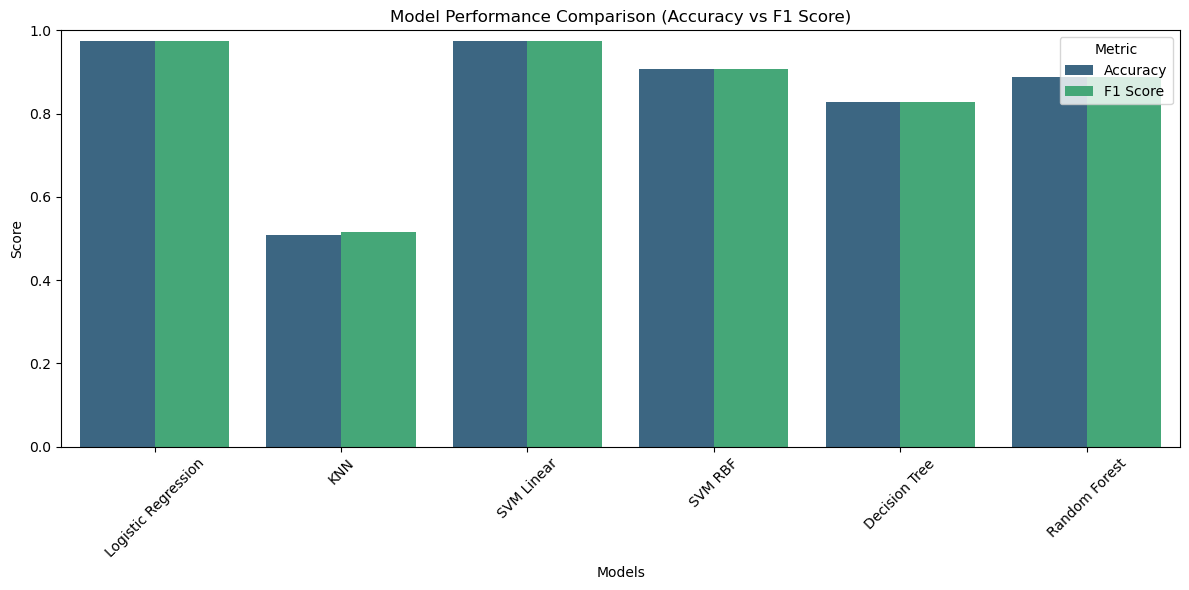

In [147]:
# Accuracy and F1 Score Comparison

# Models and their metrics
models = ['Logistic Regression', 'KNN', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forest']

# Accuracy scores
accuracies = [
    accuracy_score(y_test, y_pred_log_reg),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_svm_linear),
    accuracy_score(y_test, y_pred_svm_rbf),
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_forest)
]

# F1 scores
f1_scores = [
    f1_score(y_test, y_pred_log_reg, average='weighted'),
    f1_score(y_test, y_pred_knn, average='weighted'),
    f1_score(y_test, y_pred_svm_linear, average='weighted'),
    f1_score(y_test, y_pred_svm_rbf, average='weighted'),
    f1_score(y_test, y_pred_tree, average='weighted'),
    f1_score(y_test, y_pred_forest, average='weighted')
]

# Create a DataFrame for plotting (use a unique variable name to avoid overwriting)
comparison_data = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'F1 Score': f1_scores
})

# Melt the DataFrame to a long format for grouped bar plot
comparison_data_melted = pd.melt(comparison_data, id_vars='Model', 
                                 value_vars=['Accuracy', 'F1 Score'], 
                                 var_name='Metric', value_name='Score')

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=comparison_data_melted, palette='viridis')
plt.title("Model Performance Comparison (Accuracy vs F1 Score)")
plt.ylabel("Score")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Ensure y-axis range is between 0 and 1
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

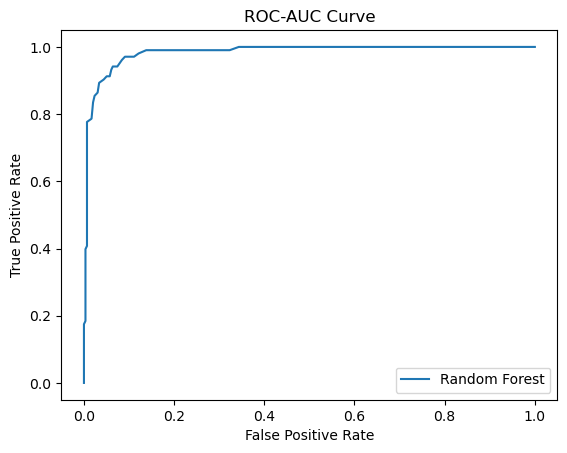

In [148]:
# Random Forest ROC-AUC
y_pred_proba = random_forest.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
plt.plot(fpr, tpr, label="Random Forest")
plt.title("ROC-AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

DataFrame shape: (1998, 22)
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_width   ram  sc_h  sc_w  talk_time  three_g  \
0        188        2  ...       756  2549     9     7         19        0   
1        136        3  ...      1988  2631    17     3          7        1   
2        145        5  ...      1716  2603    11     2          9        1   
3        131        6  ...      1786  2769    16     8         11        1   
4        141        2  ...      1212  1411     8     2         15        1   

   touch_screen  wifi 

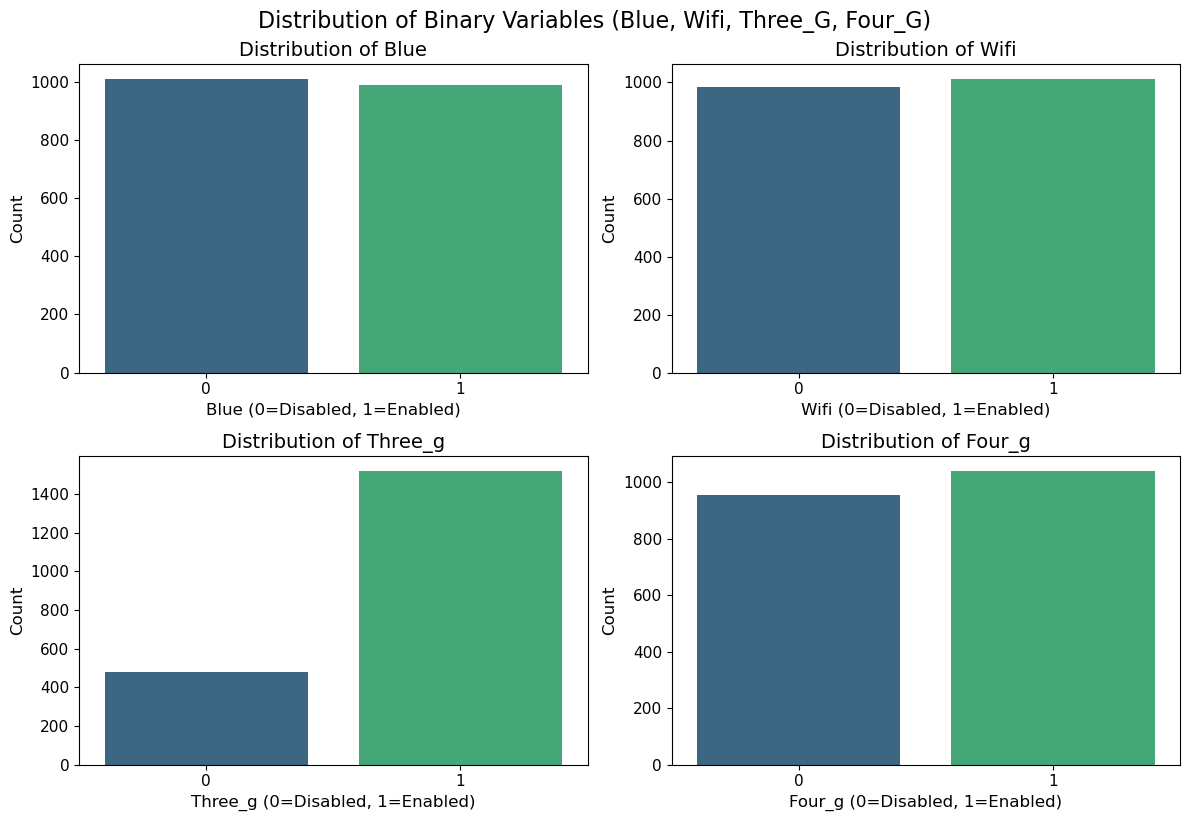

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to plot
variables = ['blue', 'wifi', 'three_g', 'four_g']

# Debug: Check DataFrame content and variables
print("DataFrame shape:", data.shape)
print(data.head())

# Check if columns exist in the DataFrame
variables = [var for var in variables if var in data.columns]
print("Variables to plot:", variables)

# Proceed only if there are variables to plot
if not variables:
    print("No matching columns found in the dataset.")
else:
    # Set up the plot grid
    plt.figure(figsize=(12, 8))
    for i, var in enumerate(variables, start=1):
        plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
        sns.countplot(x=var, data=data, palette='viridis')
        plt.title(f"Distribution of {var.capitalize()}", fontsize=14)
        plt.xlabel(f"{var.capitalize()} (0=Disabled, 1=Enabled)", fontsize=12)
        plt.ylabel("Count", fontsize=12)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=11)

    # Adjust layout
    plt.tight_layout()
    plt.suptitle("Distribution of Binary Variables (Blue, Wifi, Three_G, Four_G)", fontsize=16, y=1.02)
    plt.show()

In [150]:
# Save updated data
data.to_csv("cleaned_dataset.csv", index=False)

Model saved as 'random_forest_model.pkl'.
Cross-Validation Scores: [0.885      0.875      0.8925     0.87719298 0.86215539]
Mean Accuracy: 0.88


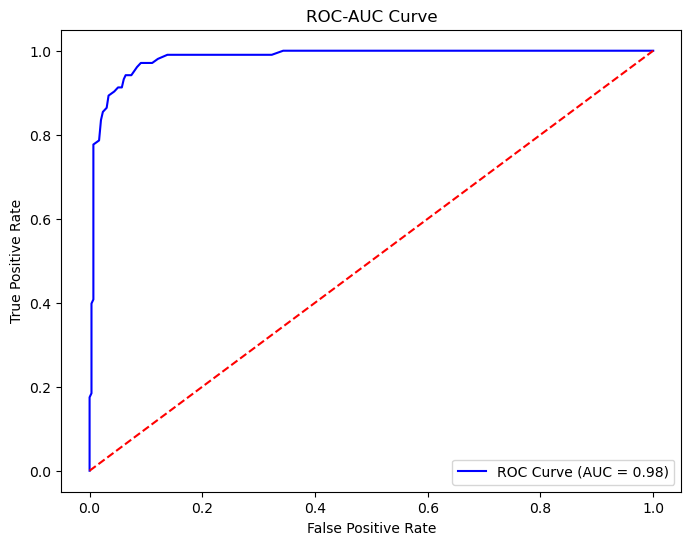

Top Features by Importance:
         Feature  Importance
0            ram    0.445106
1  battery_power    0.070913
2      px_height    0.055562
3       px_width    0.055008
4       distance    0.042776
5      mobile_wt    0.037979
6     int_memory    0.035571
7           sc_h    0.030582
8             pc    0.029913
9    clock_speed    0.029008


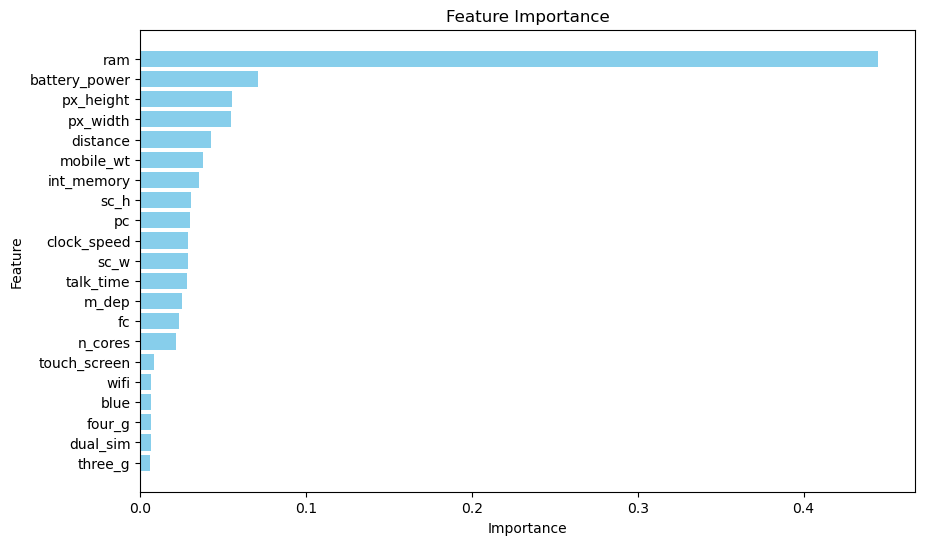

In [151]:
import joblib

# Step 1: Save the model
joblib.dump(random_forest, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'.")

# Step 2: Cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(random_forest, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")

# Step 3: Evaluate with ROC-AUC Curve
y_prob = random_forest.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)  # Adjust `pos_label` based on target encoding
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()

# Step 4: Feature Importance
importances = random_forest.feature_importances_  # Extract feature importances
feature_names = X.columns  # Use column names from your dataset
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the top features
print("Top Features by Importance:")
print(importance_df.head(10))  # Display top 10 features

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Display the highest importance at the top
plt.show()

Statistics for Top Predictors:
                     Feature         Mean  Median  Standard Deviation  \
0                        ram          NaN     NaN                 NaN   
1              battery_power          NaN     NaN                 NaN   
2                  px_height          NaN     NaN                 NaN   
3                   px_width          NaN     NaN                 NaN   
4                   distance          NaN     NaN                 NaN   
5                  mobile_wt          NaN     NaN                 NaN   
6                 int_memory          NaN     NaN                 NaN   
7                       sc_h          NaN     NaN                 NaN   
8                         pc          NaN     NaN                 NaN   
9                clock_speed          NaN     NaN                 NaN   
battery_power            NaN  1238.435435  1225.0          439.620803   
clock_speed              NaN     1.522723     1.5            0.816090   
distance            

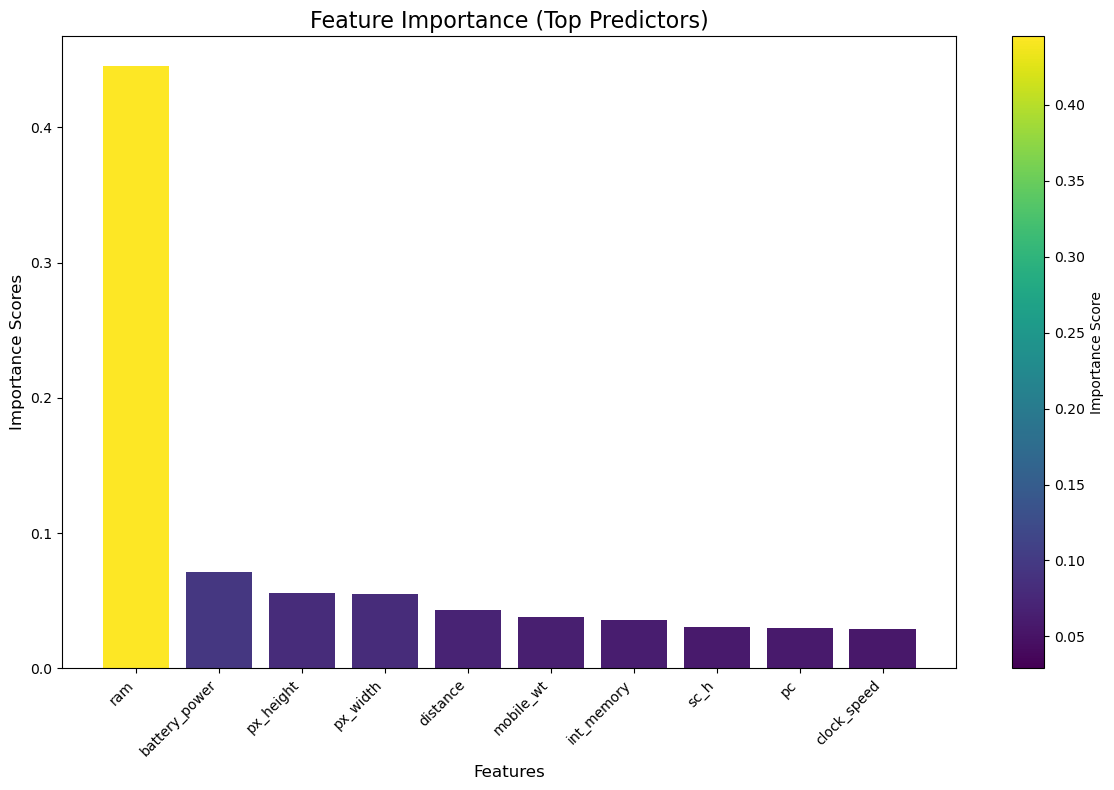

In [152]:
# Step 1: Calculate Statistics for Top Predictors
# Get the top predictors (adjust the number as needed, e.g., top 5 or top 10)
import matplotlib.cm as cm

# Ensure top_predictors DataFrame is defined
top_predictors = importance_df.head(10)  # Adjust to include top N features as needed

# Calculate statistics for the top predictors
statistics = pd.DataFrame({
    'Feature': top_predictors['Feature'],
    'Mean': data[top_predictors['Feature']].mean(),
    'Median': data[top_predictors['Feature']].median(),
    'Standard Deviation': data[top_predictors['Feature']].std(),
    'Importance': top_predictors['Importance']
})

# Display the statistics
print("Statistics for Top Predictors:")
print(statistics)

# Normalize importance scores to map them within the colormap range
normalized_importance = top_predictors['Importance'] / top_predictors['Importance'].max()
colors = cm.viridis(normalized_importance)

# Bar Chart of Feature Importance Scores with Different Colors
plt.figure(figsize=(12, 8))
plt.bar(top_predictors['Feature'], top_predictors['Importance'], color=colors)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance Scores', fontsize=12)
plt.title('Feature Importance (Top Predictors)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add a colorbar to indicate importance levels
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=top_predictors['Importance'].min(), vmax=top_predictors['Importance'].max()))
sm.set_array([])  # Required for ScalarMappable
plt.colorbar(sm, label='Importance Score')

plt.tight_layout()
plt.show()

Tree Depths:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Training Accuracies:  [0.6545682102628285, 0.7878598247809763, 0.8366708385481852, 0.8829787234042553, 0.9261576971214017, 0.9530663329161452, 0.9762202753441802, 0.9943679599499374, 0.9974968710888611, 0.9993742177722152, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Validation Accuracies:  [0.66, 0.82, 0.825, 0.845, 0.8725, 0.8825, 0.89, 0.9, 0.885, 0.9075, 0.8975, 0.91, 0.9025, 0.9025, 0.9175, 0.895, 0.8975, 0.8925, 0.8875]


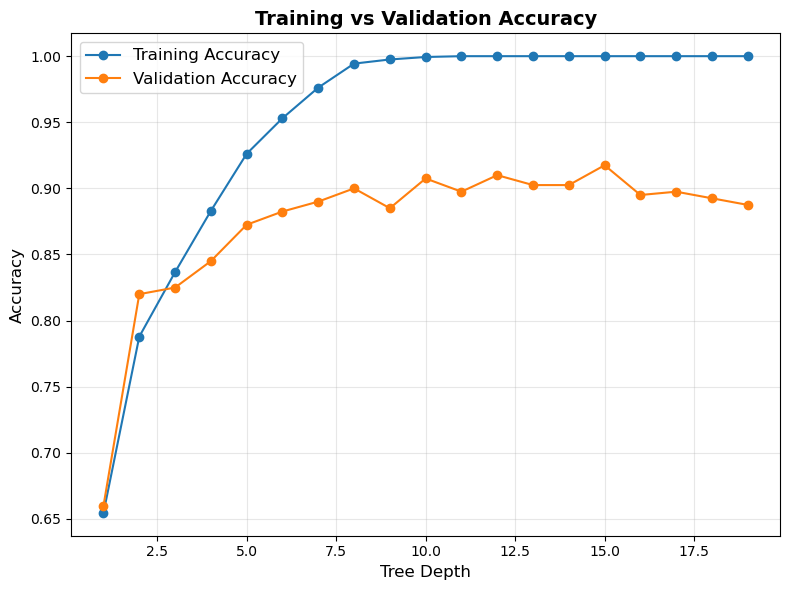

In [153]:
# Simulate varying tree depths to analyze training vs validation accuracy
train_accuracies = []
val_accuracies = []
tree_depths = range(1, 20)  # Range of depths for the decision tree in Random Forest

for depth in tree_depths:
    model = RandomForestClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Accuracy on training and validation datasets
    train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    val_accuracies.append(accuracy_score(y_test, model.predict(X_test)))

# Print the coordinates
print("Tree Depths: ", list(tree_depths))
print("Training Accuracies: ", train_accuracies)
print("Validation Accuracies: ", val_accuracies)

# Plot the training vs validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(tree_depths, train_accuracies, label="Training Accuracy", marker='o')
plt.plot(tree_depths, val_accuracies, label="Validation Accuracy", marker='o')

# Add chart details
plt.title("Training vs Validation Accuracy", fontsize=14, weight='bold')
plt.xlabel("Tree Depth", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Save the plot as an image
plt.savefig("training_vs_validation_accuracy.png")
plt.show()

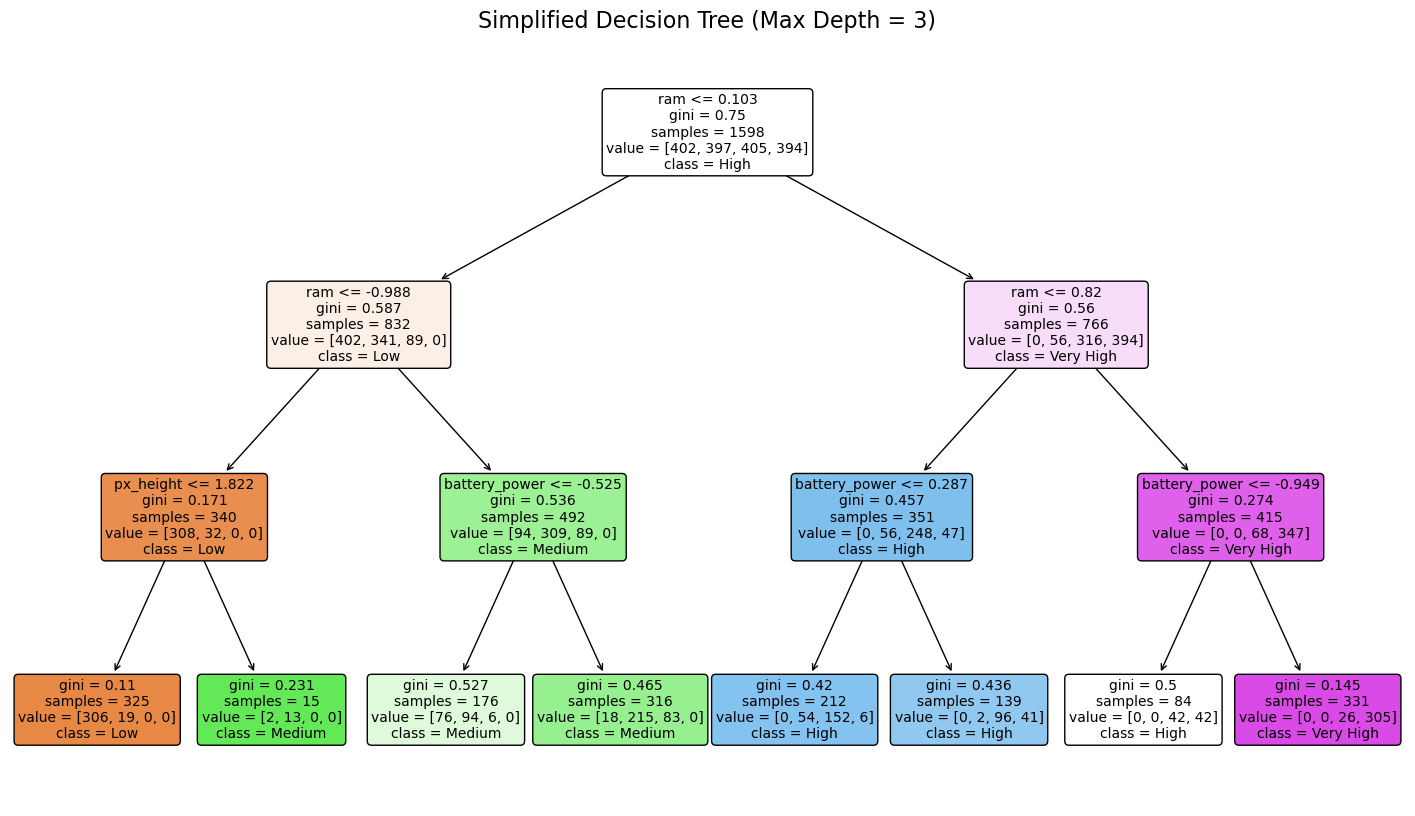

In [154]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train a simplified Decision Tree
simplified_tree = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limiting depth for clarity
simplified_tree.fit(X_train, y_train)

# Visualize the simplified Decision Tree
plt.figure(figsize=(18, 10))
plot_tree(
    simplified_tree, 
    feature_names=X.columns, 
    class_names=['Low', 'Medium', 'High', 'Very High'],  # Adjust target labels as needed
    filled=True, 
    rounded=True, 
    fontsize=10
)

# Add a title
plt.title("Simplified Decision Tree (Max Depth = 3)", fontsize=16)
plt.show()